In [2]:
%matplotlib inline

In [3]:
import pandas as pd
from sklearn.cross_decomposition import PLSRegression

In [4]:
import csv
import matplotlib.pyplot as plt

In [5]:
from scipy import stats

import sklearn
from sklearn import linear_model
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import random
from random import shuffle

In [6]:
import math
import numpy as np

In [7]:
df_ON_OF = pd.read_csv("ON_OF.txt", sep='\t')

In [8]:
df_YN_ON = pd.read_csv("YN_ON.txt", sep='\t')

In [9]:
df_YF_OF = pd.read_csv("YF_OF.txt", sep='\t')

In [10]:
df_YN_YF = pd.read_csv("YN_YF.txt", sep='\t')

In [11]:
df_ON = df_ON_OF[[19,4,6,7,8,9]];

In [12]:
df_OF = df_ON_OF[[19,4,10,11,12,13]]

In [13]:
df_YN = df_YN_ON[[19,4,6,7,8,9]]

In [14]:
df_YF = df_YN_YF[[19,4,10,11,12,13]]

In [15]:
def drop_dup(d):
    d = d.drop_duplicates(subset='gene', keep='first')
    return d

def merge(d1, d2):
    return pd.merge(d1, d2, how='outer', on=['gene','width'])

def merge2(d1, d2):
    return pd.merge(d1, d2, how='outer', on='gene')

In [16]:
dft = merge(df_ON, df_OF)

In [17]:
dft = merge(dft, df_YN)

In [18]:
dft = merge(dft, df_YF)

In [19]:
dft = drop_dup(dft)

In [20]:
dft.dropna(thresh=(2), axis=0);

In [21]:
dft = dft[pd.notnull(dft).all(axis=1)]

In [22]:
df = dft

In [23]:
state_dict = {'AT2.young.flu.20150416': 'YF', 'AT2.old.naive.20150416': 'ON', 
                 'AT2.old.flu.20150416': 'OF', 'AT2.young.naive.20150416': 'YN'}

In [27]:
def rename_cols(df, state_dict):
    cols = df.columns
    temp_cols = list(cols)
    #print temp_cols
    for c in range(len(cols)):
        state_name = cols[c][:-2]
        #sample_num = cols[c][-2:]
        total_name = cols[c]
        #print state_name
        if state_name in state_dict:
            new_state_name = state_dict[state_name]
            new_col = total_name.replace(state_name, new_state_name)
            temp_cols[c] = new_col
            #print abb_pair_dict[state_name]
    df.columns = temp_cols
    #print temp_cols
    return df
        
def df_to_names(df):
    
    name_dict = {}
        
    for i in range(2,len(df.columns)):
        name = df.columns[i][:-2]
        if name in name_dict:
            name_dict[name].append(i)
        else:
            name_dict[name] = [i]
            
    return name_dict

def vipp(x, y, t, w):

    """
    From original MATLAB code
    See https://code.google.com/p/carspls/

    #+++ vip=vipp(x,y,t,w);
    #+++ t: scores, which can be obtained by pls_nipals.m
    #+++ w: weight, which can be obtained by pls_nipals.m
    #+++ to calculate the vip for each variable to the response;
    #+++ vip=sqrt(p*q/s);
    """
    #initializing
    [p, h] = w.shape
    co = np.matrix(np.zeros([1, h]))

    # Calculate s
    for ii in range(h):
        corr = np.corrcoef(y, t[:, ii], rowvar=0)
        co[0, ii] = corr[0, 1]**2
    s = np.sum(co)

    # Calculate q
    # This has been linearized to replace the original nested for loop
    w_power = np.power(w, 2)
    d = np.multiply(w_power, co)
    q = np.sum(d, 1)
    vip = np.sqrt(p*q/s)
    return vip

df = rename_cols(df, state_dict)
name_dict = df_to_names(df)
gene_list = np.array(df['gene'])
gene_dict = {i: gene_list[i] for i in range(len(gene_list))}

In [26]:
df = rename_cols(df, state_dict)

In [322]:
y = [0,0,0,0,10,10,10,10]

In [323]:
y = [y]

In [324]:
y

[[0, 0, 0, 0, 10, 10, 10, 10]]

In [353]:
from scipy import stats
#stats.zscore(a)

In [ ]:
stats.zscore(Xo)

In [384]:
Xo = np.array(df.ix[:,range(10,18)])
#Xo = stats.zscore(Xo, axis=1)
Xo = log_trans(X)
y = [0,0,0,0,1000,1000,1000,1000]
yo = [y]

#Xo = np.concatenate((yo, Xo), axis = 0)
X = Xo.transpose()

In [316]:
def log_trans(X):
    for row in range(len(X)):
        for v in range(len(X[row])):
            X[row][v] = np.log(X[row][v] + 1)
    return X

In [385]:
pca = PCA(n_components=3)
X_r = pca.fit(X).transform(X)

pc1 = pca.components_[0]
pc1_ind = np.argsort(pc1)

pc2 = pca.components_[1]
pc2_ind = np.argsort(pc2)

In [383]:
n_pcs = 2

y = [0,0,0,0,1,1,1,1]
pls = PLSRegression(n_pcs, scale=False)
pls.fit(X, y)
vips = vipp(X, y, pls.x_scores_, pls.x_weights_)
vips = np.array([float(i) for i in vips])
vip_ind = np.argsort(vips)
vip_ind = vip_ind[::-1]


ValueError: Found arrays with inconsistent numbers of samples: [    8 14285]

In [380]:
vip_ind[:100]

array([11962,  2692, 11952, 12692, 11946, 11943, 11959, 11960, 14255,
       11958, 11961, 11641,  4433,  2929,  3756, 11954,  3899, 12434,
        7988, 12802, 11941, 11927,  7993, 11942, 11606,  2340,  3533,
        3545,  2567, 11964,  7649, 12683, 11195, 12044, 10047,  7481,
        3902, 12168,  8402,  9561, 10788,  5574,  2928,  1236, 10657,
        8186,  7476,   898, 11541, 12227,  2572, 14207, 12439, 11582,
       10461,  4456,  2335,  7174, 10887, 10808,  7704, 10067,  8591,
       11201,  4716, 13080,   478,  7858, 12325, 10567, 11052,  3423,
       13755,  2620,   519,  3246, 10556, 12433,  5679,  9554, 12628,
       12167,   932, 11851, 10825,   771,  6464,  3364, 11909,  9958,
        8530, 13320, 13800,  1848, 14242, 13707,  1180, 11629, 11711, 10116])

In [351]:
va = np.array([ 2693, 11963, 11953, 11947, 11944, 12693, 11960, 11961, 11959,
           0, 11642,  4434, 14256, 11962,  3757, 12435,  2930, 11955,
        7994, 12701, 11928,  3900, 11942, 11607, 12803,  2341, 11943,
        2568,  3534, 11196, 13829,  7650, 11965, 12684, 10789, 10048,
       12045,  3551,  3546, 10658, 10809,  8403,  7482,  3903, 10888,
         899,  2929, 10462, 11583,  1237,  6465,  8187,  5575, 11542,
        5680,  4457,  7477,  9805,  7175,  9562,   479, 12440,  2573,
        7989,  7859,  7705,  1256,  3247, 11630,  4717, 14243,  2336,
        3424, 10568, 12434, 13081, 12228, 12169, 10068,  8592,  5503,
         520, 12168, 11852,   507,   933,  2621, 11202,  9555, 12629,
       13801,  8091, 10653, 13708,   772, 11712, 13756,  8531, 11951, 11890])

In [374]:
sum(vip_ind[:100][i] in va for i in range(100))

2

In [308]:
pc1_ind

array([11963, 11953, 11947, ...,  2930, 11642,  4434])

In [285]:
len(pc1)

14286

In [287]:
np.mean(pc1)

-0.00016881162709983465

In [282]:
np.mean(vips)

0.048348485091173635

In [259]:
to=[]
for i in range(100):
    pi = pc1_ind[i]
    pi2 = pc2_ind[i]
    vi = vip_ind[i]
    
    pci = pc1[pi]
    pci2 = pc2[pi]
    
    vii = vips[vi]
    
    pvi = pc1[vi]
    
    to.append(-vii/pci)
    #print vii
#    print pi, pci, vi, vii, -vii/pci

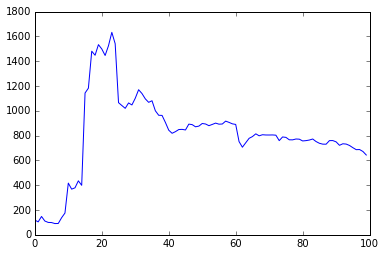

In [260]:
plt.plot(to)

In [261]:
tt = []
for i in vip_ind[:200]:
    vi = vips[i]
    pi = abs(pc1[i])
    tt.append(vi/pi)

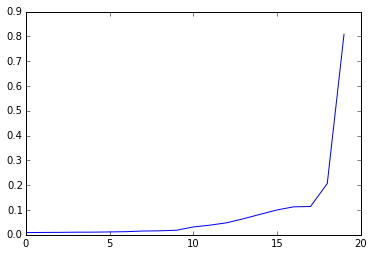

In [262]:
plt.plot([pc2[i] for i in pc2_ind[-20:]])

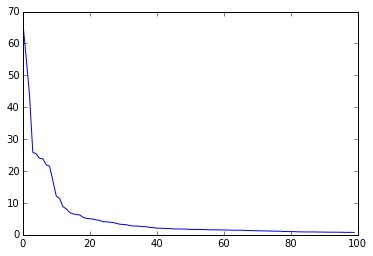

In [194]:
plt.plot([vips[i] for i in vip_ind[:100]])

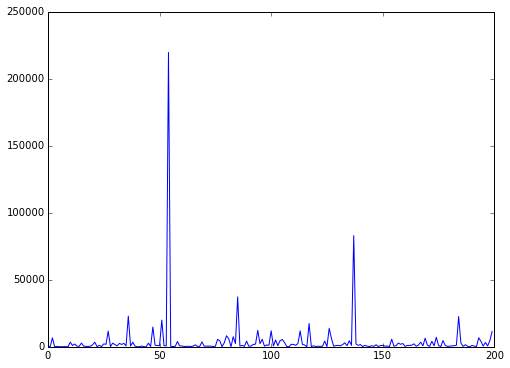

In [199]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(tt)


In [120]:
for i, v in enumerate(vips):
    if v > 10:
        print i, gene_dict[i], v

2692 Sftpc 66.9594197635
3545 Scgb1a1 15.5625106373
3756 Cbr2 11.7131080083
4433 Lcn2 13.8391824073
11641 H2-K1 10.7346985449
11943 mt-Nd1 25.0634945286
11946 mt-Nd2 30.3193434943
11952 mt-Co1 49.6270572961
11958 mt-Nd4 20.4079468924
11959 mt-Nd5 22.5752450224
11960 mt-Nd6 20.5103046134
11961 mt-Te 12.1402998531
11962 mt-Cytb 51.6614283105
12692 Gm23935 14.1041461727


In [121]:
for i, v in enumerate(pc1):
    if v > .01:
        print i, gene_dict[i], v

2929 Ly6e 0.0281674396993
3899 Ifitm3 0.0247412191906
4433 Lcn2 0.0515142918723
7649 Isg15 0.01099083586
7993 Lrg1 0.0236034582654
11606 B2m 0.015674505883
11641 H2-K1 0.0382625136112
11927 Chi3l1 0.0276664259807
12434 H2-D1 0.0255682499417
12700 Igkc 0.0104251186528
12802 Ifi27l2a 0.0171149411848
13828 Igha 0.0103434707356


In [275]:
#X = np.array(df.ix[:,range(2,18)]).transpose()

y = np.array([0,0,0,0,1,1,1,1])#,2,2,2,2,3,3,3,3])
y = y[:len(X)]
n = int(len(X)/4)